Source: https://youtu.be/jmX4FOUEfgU

In [1]:
#| default_exp basic

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
#| hide
import nbdev; nbdev.nbdev_export()

In [4]:
#| export
import numpy as np
from matplotlib import pyplot as plt

# Basic

### Optimization

##### Minimize $f(x)=(x-3)^2$

In [10]:
def f(x):
    return (x-3)**2

In [11]:
from scipy.optimize import minimize

In [16]:
res = minimize(f, 22)

In [17]:
res

      fun: 9.30665156317108e-16
 hess_inv: array([[0.50000001]])
      jac: array([-4.6112449e-08])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.99999997])

So `f(x)` at smallest if `x = 2.99999999`

##### Minimize $f(x, y)=(x-1)^2+(y-2.5)^2$

that subjective to

$$\begin{gathered}
x-2 y+2 \geq 0 \\
-x-2 y+6 \geq 0 \\
-x+2 y+2 \geq 0 \\
x \geq 0 \\
y \geq 0
\end{gathered}$$

##### Flashcard

Turn these into constains that SciPy can read

$\begin{gathered}
x-2 y+2 \geq 0 \\
-x-2 y+6 \geq 0 \\
\end{gathered}$

In [62]:
cons = (
    {'type': 'ineq', 'fun': lambda v: v[0] - 2*v[1] + 2},
    {'type': 'ineq', 'fun': lambda v: -v[0] - 2*v[1] + 6},
)

Turn these into bounds that SciPy can read and explain

$\begin{gathered}
x \geq 0 \\
y \geq 0
\end{gathered}$

In [61]:
bnds = (
    (0, None),
    (0, None)
)

**Explain**

Each tuple represents the bound of each variable.

- For the first variable `x`, the bound is from `0` to infinity => `(0, None)`
- For the second variable `y`, the bound is from `0` to infinity => `(0, None)`

In [57]:
def f(v):
    return (v[0] -1)**2 + (v[1] - 2.5)**2

In [ ]:
f(v=[1, 2])

##### Code

In [45]:
bnds = (
    (0, None),
    (0, None)
)

In [44]:
cons = (
    {'type': 'ineq', 'fun': lambda v: v[0] - 2*v[1] + 2},
    {'type': 'ineq', 'fun': lambda v: -v[0] - 2*v[1] + 6},
    {'type': 'ineq', 'fun': lambda v: -v[0] + 2*v[1] + 2}
)

Minimize $f(x, y)=(x-1)^2+(y-2.5)^2$

In [92]:
def f(v):
    return (v[0] -1)**2 + (v[1] - 2.5)**2

With boundaries `bnds` and constains `cons`

In [93]:
cons, bnds

(({'type': 'ineq', 'fun': <function __main__.<lambda>(v)>},
  {'type': 'ineq', 'fun': <function __main__.<lambda>(v)>}),
 ((0, None), (0, None)))

In [94]:
from scipy.optimize import minimize

In [95]:
res = minimize(f, (1, 2), bounds=bnds, constraints=cons)

In [96]:
res

     fun: 0.7999999999999987
     jac: array([ 0.8       , -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.39999999, 1.7       ])

### Interpolation (not complete)

Suppose you have the following data

In [5]:
x = np.linspace(0, 10, 20)

In [6]:
y = x**2 * np.sin(x)

In [17]:
plt.rcParams["figure.figsize"] = (3, 2)

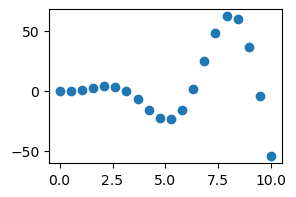

In [18]:
plt.scatter(x, y)

In [19]:
from scipy.interpolate import interp1d

In [24]:
f = interp1d(x, y, kind='linear')

Using interplote to draw a smooth line from data points `x` and `y`

In [25]:
x_dense = np.linspace(0, 10, 100)

In [28]:
y_dense = f(x_dense)

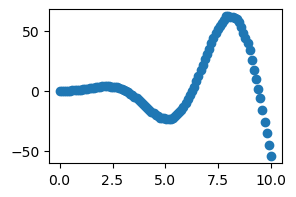

In [29]:
plt.scatter(x_dense, y_dense)

### Curve Fitting (not complete)

### Special Functions (not complete)

### Differentiations

##### Flashcard

Turn this function into code

$f(x) = x^2 \sin (2 x) \, e^{-x}$

In [34]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

In [35]:
f(2)

-0.4096883202266949

##### Code

In [30]:
from scipy.misc import derivative

In [87]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

In [51]:
x = np.arange(0, 10)

In [81]:
from scipy.misc import derivative

In [78]:
type(f)

function

In [79]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Compute the first derivative of function `f` at `x` with small change `1e-6` in x

In [80]:
derivative(f, x, dx=1e-6)

array([ 2.00000000e-12,  2.83280979e-02, -7.07688357e-01,  9.02206982e-01,
       -2.30243462e-01, -2.27697193e-01,  1.82523499e-01, -1.93966505e-02,
       -3.64852691e-02,  1.90400969e-02])

In [82]:
from scipy.misc import derivative

In [83]:
type(f)

function

In [84]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Compute the second derivative of function `f` at `x` with small change `1e-6` in x

In [85]:
derivative(f, x, dx=1e-6, n=2)

array([-4.00000000e-12, -2.28489450e+00,  1.84352533e+00, -5.89250870e-02,
       -1.03816955e+00,  6.80122625e-01, -2.78804757e-02, -1.73736026e-01,
        8.31574393e-02,  5.13651621e-03])

### Integrations

In [104]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

Compute the integral of f(x)

$f(x) = \int_0^1 x^2 \sin (2 x) e^{-x} d x$

In [109]:
type(f)

function

In [110]:
from scipy.integrate import quad

In [111]:
integral, integral_error = quad(f, a=0, b=1)

In [112]:
integral, integral_error

(0.14558175869954834, 1.6162822047366225e-15)

Compute the double integral of f(x)

##### Flashcard

Turn this function into code

$f(x) = \sin \left(x+y^2\right)$

In [119]:
def f(x, y):
    return np.sin(x+y**2)

In [120]:
f(2, 3)

-0.9999902065507035

##### Code

Compute the double integral

$\int_0^1 \int_{-x}^{x^2} \sin \left(x+y^2\right) dy \, dx$

In [130]:
from scipy.integrate import dblquad

In [131]:
f

<function __main__.f(x, y)>

In [132]:
lower_y = lambda x: -x

In [133]:
upper_y = lambda x: x**2

In [134]:
integral, integral_error = dblquad(f, 0, 1, lower_y, upper_y)

In [136]:
integral, integral_error

(0.315802507240474, 1.5634600713498928e-14)

### Differential Equation (not complete)

### Fourier Transforms (not complete)

### Examples (not complete)

### Linear Algebra (not complete)...

...